Processando base de dados

Variáveis: file, alg e min_support

In [1]:
import importlib
import utils.pre_processing_social_media as psm

importlib.reload(psm)

file = "vacinal_2025_05"

input_file = "process_datasets/" + file + ".csv"

# 1. Pré processando base de dados
print("Pré-processando textos...")
pre_processing_result, txt_database = psm.pre_processing_database(input_file)

Pré-processando textos...


Gerando Trie of Rules

Gerando árvore de regras (TOR)...


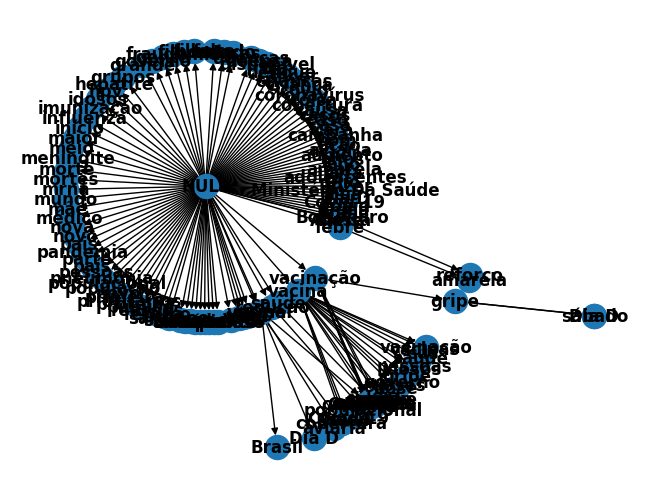

In [2]:
from trieofrules import trieofrules

#supported algorithms: FP-max, FP-growth, Apriori
alg = 'Apriori'
#alg = 'FP-max'
min_support = 0.009

file_name = f"{file}_{alg}_{min_support}"

# 2. Gera o TOR (Trie of Rules) a partir dos dados
print("Gerando árvore de regras (TOR)...")
TOR = trieofrules(data=pre_processing_result, alg=alg, min_support=min_support)
TOR.draw()

In [4]:
import os

pasta_output = "outputs"
os.makedirs(pasta_output, exist_ok=True)
output_file = os.path.join(pasta_output, file_name + ".graphml")

# 3. Salva a visualização e estrutura como .graphml
print("Salvando .graphml...")
TOR.save_graph(filename=output_file)

Salvando .graphml...


In [5]:
import os
import utils.analize_tor as ator
import networkx as nx

pasta = "outputs_clusters"
os.makedirs(pasta, exist_ok=True)

# 5. Separa cluster central dos periféricos
print("Separando cluster central de periféricos...")
G_central, G_perifericos = ator.separar_clusters_por_tamanho(output_file)

# Salva os arquivos
path_cluster_central = os.path.join(pasta, file_name + "_cluster_central.graphml")
path_clusters_perifericos = os.path.join(pasta, file_name + "_clusters_perifericos.graphml")
nx.write_graphml(G_central, path_cluster_central)
nx.write_graphml(G_perifericos, path_clusters_perifericos)

Separando cluster central de periféricos...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Análise clusters

In [5]:
import utils.analize_tor as ator
import importlib
importlib.reload(ator)

# 4. Extrai clusters com ramos hierárquicos
print("Extraindo clusters e ramos do grafo...")
all_clusters = ator.extrair_clusters(output_file)


Extraindo clusters e ramos do grafo...
Cluster 1 — Raiz: dose — 2 nós
Ramos: 
dose → reforço
Palavras:
reforço
--------------------------------------------------------------------------------
Cluster 2 — Raiz: febre — 2 nós
Ramos: 
febre → amarela
Palavras:
amarela
--------------------------------------------------------------------------------
Cluster 3 — Raiz: gripe — 5 nós
Ramos: 
gripe → sábado
gripe → aviária
gripe → Dia D
gripe → Brasil
Palavras:
Dia D, sábado, aviária, Brasil
--------------------------------------------------------------------------------
Cluster 4 — Raiz: redução — 2 nós
Ramos: 
redução → populacional
Palavras:
populacional
--------------------------------------------------------------------------------
Cluster 5 — Raiz: saúde — 2 nós
Ramos: 
saúde → sus
Palavras:
sus
--------------------------------------------------------------------------------
Cluster 6 — Raiz: vacina — 18 nós
Ramos: 
vacina → vacinas
vacina → dose
vacina → dengue
vacina → saúde
vacina → Br

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
import os
import pandas as pd
import importlib

importlib.reload(ator)

pasta = "outputs_clusters_csv"
os.makedirs(pasta, exist_ok=True)

# 5. Relaciona tweets aos clusters
print("Relacionando tweets aos clusters...")
tweets_clusters = ator.tweets_clusters(
    clusters=all_clusters, 
    textos_tokenizados=pre_processing_result, 
    textos_originais=txt_database
)

# Salva tweets relacionados por cluster
print("Salvando resultados...")
for c in tweets_clusters:
    if c["n_tweets"] == 0:
        continue
    nome = c["raiz"].replace(" ", "_")[:30]
    df_cluster = pd.DataFrame(c["tweets"])
    caminho = os.path.join(pasta, f"{file_name}_cluster_{c['cluster_idx']}_{nome}.csv")
    df_cluster.to_csv(caminho, index=False)

print("✅ Pipeline finalizado com sucesso.")

Relacionando tweets aos clusters...
Cluster 1 (Aedes) — 7 tweets relacionados
Cluster 2 (Alexandre Padilha) — 6 tweets relacionados
Cluster 3 (Brasil) — 12 tweets relacionados
Cluster 4 (aviária) — 31 tweets relacionados
Cluster 5 (câncer) — 7 tweets relacionados
Cluster 6 (dengue) — 9 tweets relacionados
Cluster 7 (fake) — 6 tweets relacionados
Cluster 8 (febre) — 6 tweets relacionados
Cluster 9 (granja) — 6 tweets relacionados
Cluster 10 (gripe) — 51 tweets relacionados
Cluster 11 (mosquito) — 6 tweets relacionados
Cluster 12 (saúde) — 44 tweets relacionados
Cluster 13 (sus) — 14 tweets relacionados
Cluster 14 (vacina) — 63 tweets relacionados
Cluster 15 (vacinação) — 13 tweets relacionados
Salvando resultados...
✅ Pipeline finalizado com sucesso.


Sumarização com IA

In [99]:
import importlib
importlib.reload(ator)

cluster = 10
prompt = ator.prompt_IA(all_clusters[cluster-1])
print(prompt)

Considere os tweets a seguir, que foram identificados como relacionados ao assunto gripe. Eles mencionam com frequência palavras como: casos, suspeitos, aviária, vacinação, frango, aves, Brasil, Rs, granja. Com base nesse conteúdo, gere um pequeno texto de 1 a 2 parágrafos, com uma síntese clara e objetiva sobre o que está sendo discutido nos tweets. O texto deve ajudar qualquer pessoa a entender rapidamente o teor das conversas, mesmo que ela não tenha lido os tweets originais. Retorne somente o resumo.


Outras Visualizações

In [6]:
import utils.pre_processing_social_media as psm
importlib.reload(psm)

pre_processing_result_simples, txt_database = psm.pre_processing_database(
    file_path = input_file,
    simples=True
)

In [7]:
print(pre_processing_result_simples)

[['fila', 'osso', 'pés', 'galinha', 'carcaça', 'frango', 'oxigênio', 'enterro', 'atraso', 'compra', 'vacinação', 'morte', 'paulo', 'gustavo', 'mundo', 'alegria', 'feijão', 'bandinha', 'arroz', 'quebradinho', 'ouro', 'pneu'], ['problema', 'eulavio', 'ostáquio', 'espanha', 'cartão', 'vacina'], ['país', 'fraudemia', 'tipo', 'coisas', 'bostil'], ['this', 'corrupt', 'dictator', 'pfizergate', 'freedomofspeech', 'must', 'resign', 'with', 'your', 'permission', 'she', 'destroying', 'our', 'countries', 'economies', 'welfare', 'culture', 'greatreplacement', 'orchestral', 'whole'], ['saúde', 'aparecida', 'campanha', 'vacinação', 'gripe', 'segunda', 'diário', 'goiás', 'conteúdo', 'verdade', 'jornalismo', 'profissional'], ['vacinação', 'influenza', 'rio', 'partir', 'meses', 'saúde', 'riodejaneiro'], ['ministério', 'saúde', 'compra', 'doses', 'vacina', 'tvcultura', 'covid'], ['vacina', 'gripe', 'prevenção', 'mato', 'grosso', 'sulcampanha', 'doses', 'influenza', 'proteção', 'coletiva', 'ultimasnoticia

In [9]:
#Nuvem de palavras

import csv
import os
import importlib
import utils.other_visualizations as ovi

importlib.reload(ovi)

pasta_raking = "ranking_palavras"
os.makedirs(pasta_raking, exist_ok=True)

ranking = ovi.ranking_words(pre_processing_result_simples, remove_duplicidades=True)
file_ranking = os.path.join(pasta_raking, f"{file_name}_ranking_palavras.csv")
with open(file_ranking, mode="w", newline="", encoding="utf-8") as arquivo_csv:
    writer = csv.writer(arquivo_csv)
    writer.writerows(ranking)

In [10]:
#Word Tree - Todos os textos como uma string 

print(" ".join(txt_database))

Parabenizo o SUS e agradeço aos trabalhadores da saúde, que têm dedicado suas forças contra o Coronavírus. Não podemos facilitar! O uso das máscaras, do álcool em gel e o distanciamento social devem continuar sendo adotados. https://t.co/qIVFyRqNUI A partir da próxima segunda-feira (6), todos os idosos acima de 60 anos de idade poderão receber a vacina Pfizer bivalente contra a Covid-19. A Prefeitura de São Paulo recebeu, nesta quarta-feira (1º), 530.776 doses do imunizante. Anvisa aprovou há pouco o uso emergencial da Coronavac. A gerência-geral de medicamentos acaba de recomendar aprovação também da vacina da Fiocruz em parceria com Oxford. Um dia histórico!Nosso reconhecimento aos institutos e ao trabalho sério e técnico da Anvisa! #VemVacinas @Metropoles Até porque o aumento do gelo é um negacionismo do gelo em não aceitar os estudos técnicos e científicos sobre o aquecimento global. Entendeu?É o gelo que não usou máscara e não tomou vacina com medo de virar jacaré. Sacou? @Lambisg

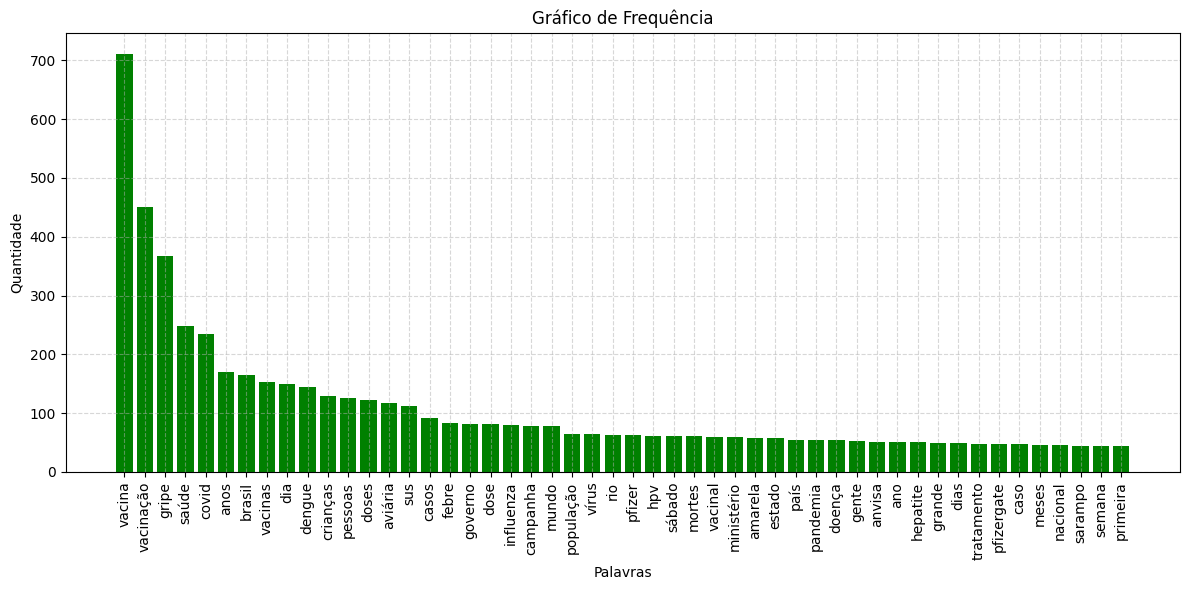

In [11]:
# Gráfico de frequência

import pandas as pd
import utils.other_visualizations as ovi

importlib.reload(ovi)

df = pd.read_csv(file_ranking, names=['palavra', 'quantidade'])
ovi.scartter_plot_from_ranking(df)


In [12]:
#Grafo de Coocorrência
import utils.other_visualizations as ovi

importlib.reload(ovi)


pasta_raking = "ranking_palavras"
os.makedirs(pasta_raking, exist_ok=True)

file_grafo = os.path.join(pasta_raking, f"{file_name}_grafo.gdf")
ovi.generate_graph_file(pre_processing_result_simples, file_grafo)
